In [1]:
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
import pandas as pd

def SSDP_DDoS(training_size, test_size, n, PLOT_DATA=True):
    class_labels = [r'BENING', r'DrDoS_SSDP']
    
    data = pd.read_csv('DrDoS_SSDP_features_removed.csv', skiprows=[i for i in range(1,141550)], skipfooter=141547, engine="python")
    x = StandardScaler().fit_transform(np.array(data.drop(columns=['Label'])))
    y = np.array(data['Label'].astype('category').cat.codes.astype(int))
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=109)
   
    pca = PCA(n_components=n).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
   
    samples = np.append(X_train, X_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    X_train = minmax_scale.transform(X_train)
    X_test = minmax_scale.transform(X_test)

    training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
    test_input = {key: (X_test[Y_test == k, :])[:test_size] for k, key in enumerate(class_labels)}
    
    if PLOT_DATA:
        for k in range(0, 2):
            x_axis_data = X_train[Y_train == k, 0][:training_size]
            y_axis_data = X_train[Y_train == k, 1][:training_size]
            label = 'DDoS' if k == 1 else 'Benign'
            plt.scatter(x_axis_data, y_axis_data, label=label)

        plt.title("DDoS_SSDP Dataset (Dimensionality Reduced With PCA)")
        plt.legend()
        plt.show()
        

    return X_train, training_input, test_input, class_labels

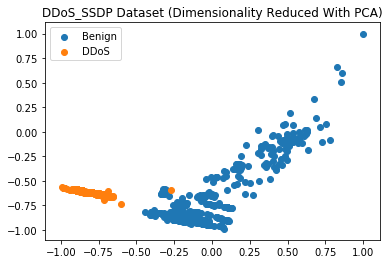

{'BENING': 0, 'DrDoS_SSDP': 1}


In [3]:
from qiskit.aqua.utils import split_dataset_to_data_and_labels

n = 2 # How many features to use (dimensionality)
training_dataset_size = 1033
testing_dataset_size = 443

sample_Total, training_input, test_input, class_labels = SSDP_DDoS(training_dataset_size, testing_dataset_size, n)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [4]:
%load_ext memory_profiler

In [5]:
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

seed = 10598


feature_map =  ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [6]:
%%time
%memit result2 = qsvm.run(quantum_instance)

peak memory: 5874.83 MiB, increment: 5528.37 MiB
CPU times: user 2d 2h 49min 10s, sys: 2h 16min 24s, total: 2d 5h 5min 34s
Wall time: 2d 6h 49min 41s


In [7]:
print("ground truth:    {}".format(datapoints[1]))
print("prediction:      {}".format(result2['predicted_labels']))
print("predicted class: {}".format(result2['predicted_classes']))
print("accuracy:        {}".format(result2['testing_accuracy']))

ground truth:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1

In [11]:
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, make_scorer

#Metrics
classification = classification_report(datapoints[1], result2['predicted_labels'])
confusion = confusion_matrix(datapoints[1], result2['predicted_labels'])
    
    # Accuracy
accuracy = round(accuracy_score(datapoints[1], result2['predicted_labels']),5)
    
    # Recall
recall = round(recall_score(datapoints[1], result2['predicted_labels'], average='macro')*100,5)
    
    # Precision
precision = round(precision_score(datapoints[1], result2['predicted_labels'], average='weighted')*100,5)
    
    # F1
f1 = round(f1_score(datapoints[1], result2['predicted_labels'], average='weighted')*100,5)

In [12]:
print(accuracy)
print(recall)
print(precision)
print(f1)
print(1-accuracy)

0.99661
99.66089
99.66127
99.66102
0.003390000000000004
